<h1 align="center"><font color='#4169E1'>Projet de traitement des images :</font> <font color='#D23B68'>Classification des cellules sanguines</font></h1>

<div class="alert alert-block alert-info" align="center">
<b align="center">Mahmahi Anis</b> 
<br>
<b align="center">Bachiri Ines</b>   
</div>

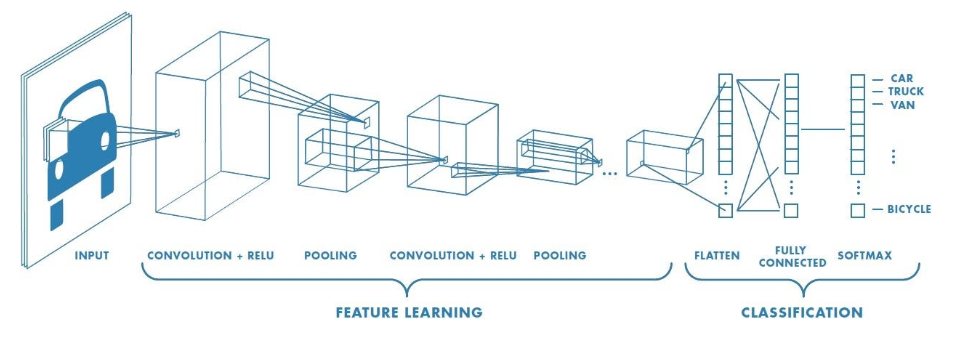

### <font color='#D23B68'>Table des matières<font><a class='anchor' id='top'></a>
- [Cas d'étude](#0)
- [Bibliothèques utilisées](#1)
- [Importation et structuration des données](#2)
- [Visualisations des données](#3)
- [Conception du modèle](#4)
- [Entrainement du modèle](#5)
- [Résultats](#6)
- [Visualisation de quelques représentations intermédiaires](#7)

<a id='0'></a>
<h1><font color='#4169E1'>Cas d'étude</font></h1>

Il existe quatre principaux types de cellules sanguines : 
- Les neutrophiles.
- Les éosinophiles. 
- Les lymphocytes.
- Les monocytes. 

Les neutrophiles sont les globules blancs les plus abondants et jouent un rôle crucial dans la défense contre les infections bactériennes. Les éosinophiles interviennent dans les réactions allergiques et la lutte contre les parasites. Les lymphocytes, subdivisés en lymphocytes B et lymphocytes T, sont responsables de la réponse immunitaire adaptative. Les monocytes, quant à eux, se transforment en macrophages et jouent un rôle essentiel dans l'élimination des débris cellulaires et des agents pathogènes.

La classification des cellules sanguines grâce au Deep Learning revêt une importance cruciale dans le domaine médical. Elle permet une identification et une distinction rapides et précises des différents types de cellules sanguines, ce qui améliore considérablement le processus de diagnostic.

Cette classification présente de multiples avantages. Tout d'abord, elle joue un rôle clé dans la numération des cellules sanguines, permettant aux médecins d'estimer les quantités de globules rouges, de globules blancs et de plaquettes présentes dans un échantillon de sang. Une classification précise facilite la détection précoce de diverses affections, telles que les infections, les troubles auto-immuns et les cancers hématologiques.

<a id='1'></a>
<h1><font color='#4169E1'>Bibliothèques utilisées</font></h1>

<h2><font color='#D23B68'>Utilisation général</font></h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2><font color='#D23B68'>Processus système</font></h2>

In [2]:
import os
import os.path
from pathlib import Path
import glob

<h2><font color='#D23B68'>Traitement d'image</font></h2>

In [4]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h2><font color='#D23B68'> Mise à l'échelle et transformation</font></h2>

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

<h2><font color='#D23B68'> Contrôle de l'Accuracy</font></h2>

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

<h2><font color='#D23B68'> Optimisateur</font></h2>

In [7]:
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer

<h2><font color='#D23B68'> Couches du modèle</font></h2>

In [8]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras import backend as K

<h2><font color='#D23B68'> Pour ignorer les warnings</font></h2>

In [9]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

<a id='2'></a>
<h1><font color='#4169E1'>Importation et structuration des données</font></h1>

<h2><font color='#D23B68'> Récupération des chemins des images et de leurs annotations</font></h2>

- On extrait les chemins des fichiers JPEG des ensembles de données d'entraînement, de test et de validation, ainsi que les étiquettes correspondantes des fichiers JPEG pour chaque ensemble de données.

In [10]:
Train_Data_Path = Path("./input/blood-cells/dataset2-master/dataset2-master/images/TRAIN")
Test_Data_Path = Path("./input/blood-cells/dataset2-master/dataset2-master/images/TEST")
Validation_Data_Path = Path("./input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE")

# JPG PATH
Train_JPG_Path = list(Train_Data_Path.glob(r"**/*.jpeg"))
Test_JPG_Path = list(Test_Data_Path.glob(r"**/*.jpeg"))
Validation_JPG_Path = list(Validation_Data_Path.glob(r"**/*.jpeg"))

# JPG LABELS
Train_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_JPG_Path))
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))
Validation_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Validation_JPG_Path))

<h2><font color='#D23B68'> Transformation vers une structure de série</font></h2>

- Nous convertissons les listes de chemins de fichiers JPEG et d'étiquettes en objets de la série Pandas pour faciliter leur manipulation et leur analyse ultérieure. Les chemins de fichiers JPEG d'entraînement sont stockés dans une série appelée "JPG" et les étiquettes correspondantes sont stockées dans une série appelée "CATEGORY". De même, nous créons des séries pour les ensembles de données de test et de validation. Cela nous permettra d'utiliser les fonctionnalités de Pandas pour effectuer des opérations sur les données plus facilement par la suite.

In [11]:
#Train
Train_JPG_Path_Series = pd.Series(Train_JPG_Path,name="JPG").astype(str)
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels,name="CATEGORY")

#Test
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="CATEGORY")

# Validation
Validation_JPG_Path_Series = pd.Series(Validation_JPG_Path,name="JPG").astype(str)
Validation_JPG_Labels_Series = pd.Series(Validation_JPG_Labels,name="CATEGORY")

<h2><font color='#D23B68'> Transformation en DataFrame</font></h2>

- On regroupe les chemins des fichiers JPEG et les étiquettes correspondantes d'entraînement, de test et de validation dans un seul DataFrame principal pour chaque ensemble de données. Cela facilite l'accès et la manipulation des données lors des étapes suivantes du projet.

In [12]:
Main_Train_Data = pd.concat([Train_JPG_Path_Series,Train_JPG_Labels_Series],axis=1)
Main_Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)
Main_Validation_Data = pd.concat([Validation_JPG_Path_Series,Validation_JPG_Labels_Series],axis=1)

<h2><font color='#D23B68'> Shuffling</font></h2>

- On mélange aléatoirement les données dans les DataFrames afin de garantir un ordre aléatoire des échantillons. Cela peut être bénéfique pour éviter tout biais potentiel lors de l'entraînement et de l'évaluation des modèles d'apprentissage profond, en s'assurant que les données sont réparties de manière aléatoire.

In [13]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)
Main_Validation_Data = Main_Validation_Data.sample(frac=1).reset_index(drop=True)
Main_Train_Data.head(-1)

,JPG,CATEGORY
0,input/blood-cells/dataset2-master/dataset2-mas...,NEUTROPHIL
1,input/blood-cells/dataset2-master/dataset2-mas...,NEUTROPHIL
2,input/blood-cells/dataset2-master/dataset2-mas...,EOSINOPHIL
3,input/blood-cells/dataset2-master/dataset2-mas...,NEUTROPHIL
4,input/blood-cells/dataset2-master/dataset2-mas...,MONOCYTE
...,...,...
9951,input/blood-cells/dataset2-master/dataset2-mas...,EOSINOPHIL
9952,input/blood-cells/dataset2-master/dataset2-mas...,MONOCYTE
9953,input/blood-cells/dataset2-master/dataset2-mas...,NEUTROPHIL
9954,input/blood-cells/dataset2-master/dataset2-mas...,LYMPHOCYTE


<a id='3'></a>
<h1><font color='#4169E1'>Visualisations des données</font></h1>

In [14]:
plt.style.use('dark_background')

<h2><font color='#D23B68'> Equilibre des classe </font></h2>

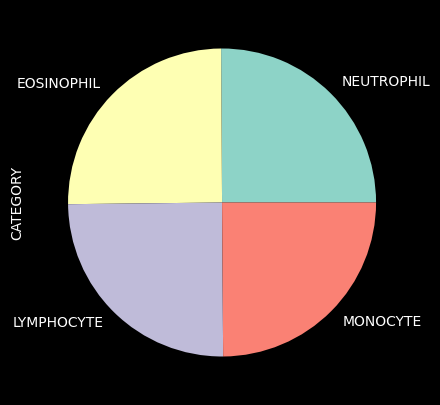

In [15]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

$\rightarrow$ La distribution des catégories dans l'ensemble de données d'entraînement est équitable, ce qui signifie que les échantillons sont répartis de manière équilibrée entre les différentes catégories.

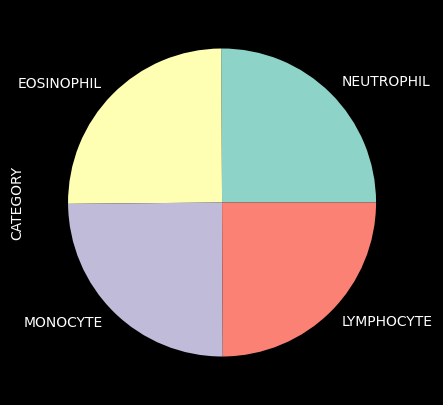

In [16]:
Main_Test_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

$\rightarrow$ La distribution des catégories dans l'ensemble de données de test est équitable, ce qui indique que les échantillons sont répartis de manière équilibrée entre les différentes catégories.

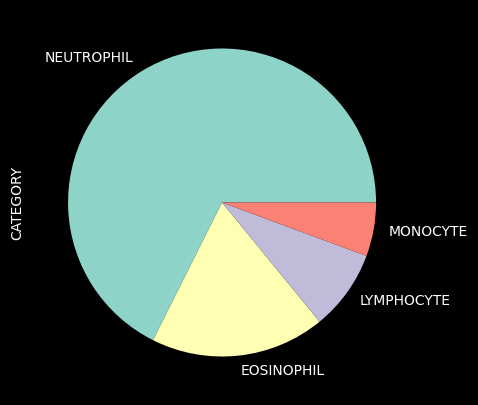

In [17]:
Main_Validation_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

$\rightarrow$ La distribution des catégories dans l'ensemble de données de validation n'est pas équitable, ce qui signifie que les échantillons ne sont pas répartis de manière équilibrée entre les différentes catégories

<h2><font color='#D23B68'> Visualisation d'une image</font></h2>

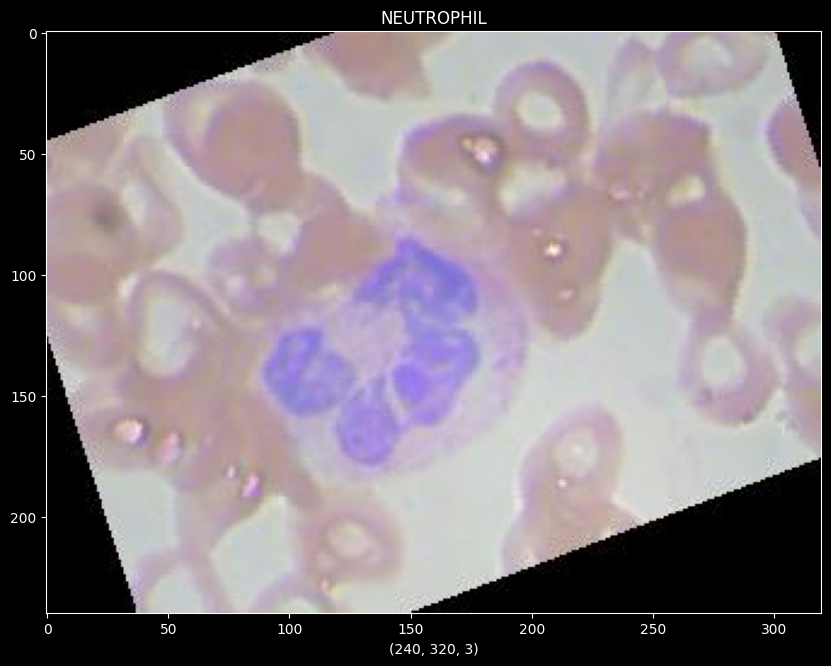

In [29]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Train_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][0])
plt.show()

<h2><font color='#D23B68'>Aperçu visuel d'un ensemble d'images</font></h2>

$\rightarrow$ Cela permet de vérifier visuellement la qualité des images et d'observer les différentes catégories présentes dans l'ensemble de données.

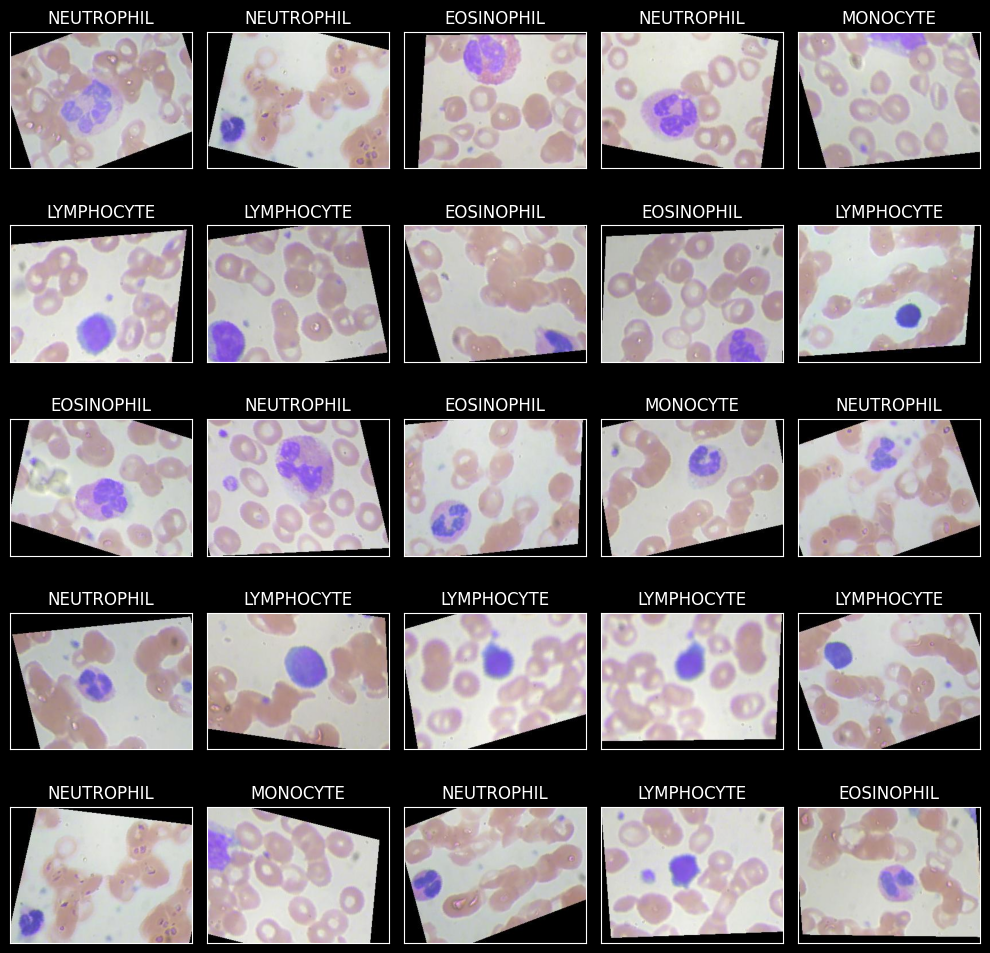

In [19]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

<a id='4'></a>
<h1><font color='#4169E1'>Conception du modèle</font></h1>

<h2 align="center"><font color='#D23B68'>ResNet</font></h2>

**ResNet**, ou **Réseau de Neurones Résiduels**, est une architecture de réseau de neurones profonds qui a révolutionné l'apprentissage des modèles de vision par ordinateur. Grâce à l'utilisation de connexions résiduelles, **ResNet** facilite l'apprentissage et la convergence des réseaux profonds.

Traditionnellement, chaque couche d'un réseau cherche à apprendre directement une transformation complète de l'entrée vers la sortie attendue. Cependant, cela devient difficile à mesure que le réseau devient plus profond en raison du problème de la disparition du gradient.

Avec **ResNet**, chaque bloc résiduel du réseau apprend la différence ou le résidu entre l'entrée et la sortie attendue. Cette différence est ajoutée à l'entrée d'origine via une connexion résiduelle. Ainsi, le modèle peut apprendre une transformation identitaire lorsque cela est nécessaire, en copiant simplement l'entrée vers la sortie.

En utilisant les connexions résiduelles, **ResNet** facilite l'apprentissage des réseaux profonds en permettant aux blocs résiduels d'apprendre les différences par rapport à l'identité. Cela conduit à des performances améliorées dans des tâches telles que la classification d'images.

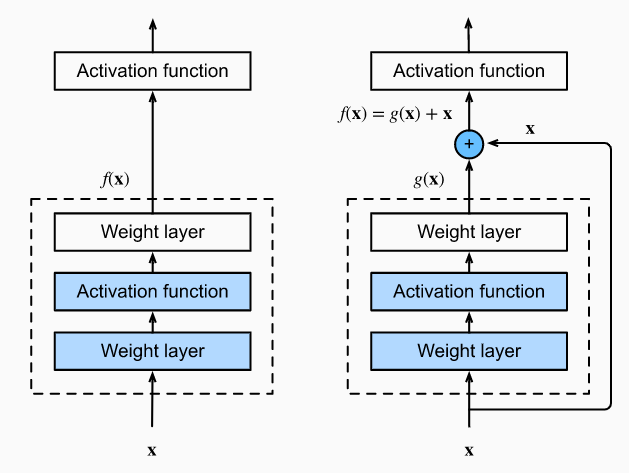

- **Dans un bloc régulier (à gauche) :** la partie à l'intérieur du cadre en pointillés doit apprendre directement la correspondance entre l'entrée et la sortie $f(x)$. 
- **Dans un bloc résiduel (à droite) :** la partie à l'intérieur du cadre en pointillés doit apprendre la correspondance résiduelle $g(x) = f(x) - x$, ce qui facilite l'apprentissage de la correspondance identitaire.

<div style="display: flex; justify-content: center;">
  <div style="margin: 10px; text-align: center; background-color: #FFB6C1; padding: 10px;">
    <h3>Batch Normalization</h3>
    <p> La normalisation par lots normalise les activations des différentes couches d'un réseau de neurones, ce qui améliore la stabilité et la vitesse de convergence de l'apprentissage.</p>
  </div>
  <div style="margin: 10px; text-align: center; background-color: #B19CD9; padding: 10px;">
    <h3>Activation ReLU</h3>
    <p>C'une fonction d'activation qui introduit de la non-linéarité dans le modèle, permettant ainsi au réseau de neurones d'apprendre des représentations complexes et de mieux capturer les motifs dans les données.</p>
  </div>
  <div style="margin: 10px; text-align: center; background-color: #AED6F1; padding: 10px;">
    <h3>Convolution 3x3</h3>
    <p>La convolution 3x3 est une opération fondamentale dans les réseaux de neurones convolutifs. Elle applique un filtre de taille 3x3 à une image ou à une activation afin d'extraire des caractéristiques locales et de détecter des motifs spécifiques dans les données.</p>
  </div>
</div>


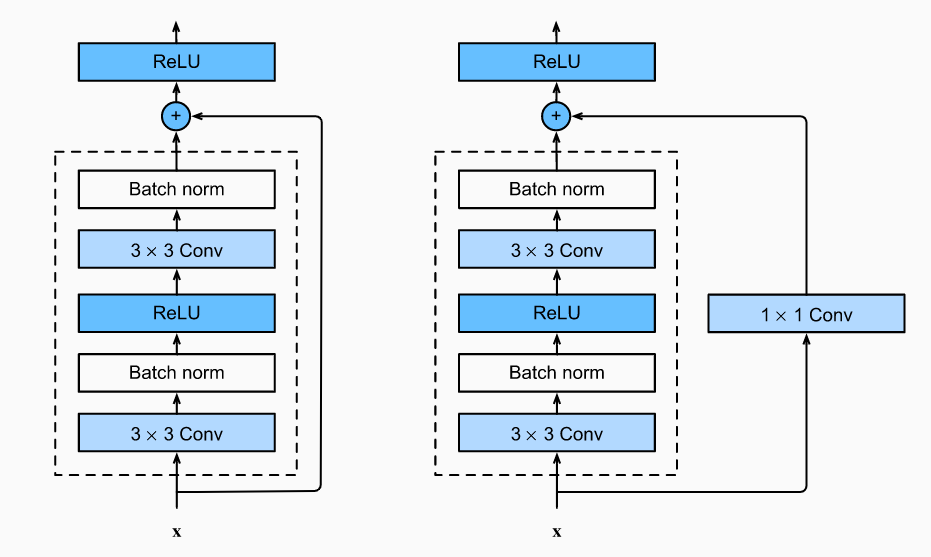

<h2><font color='#D23B68'>Implémentation des blocks</font></h2>

 `identity_block` implémente un bloc d'identité dans une architecture de réseau de neurones convolutifs (CNN). Un bloc d'identité est une unité de base qui permet d'apprendre des caractéristiques complexes sans modifier la taille spatiale des données d'entrée.

Dans cette fonction, les paramètres `input_`, `kernel_size` et `filters` sont les entrées nécessaires pour construire le bloc d'identité. Le paramètre `input_` représente les données d'entrée du bloc, `kernel_size` indique la taille du noyau de convolution utilisé, et `filters` spécifie le nombre de filtres à appliquer.

Le bloc d'identité est construit en utilisant des couches de convolutions, de normalisation par lots (batch normalization) et d'activation. Plus précisément, la fonction effectue les opérations suivantes :

1. Une couche de convolution **1x1** est appliquée sur les données d'entrée (`input_`) avec le nombre de filtres `f1`.
2. Une normalisation par lots est effectuée sur les résultats de la première convolution.
3. Une fonction d'activation **ReLU** est appliquée.
4. Une couche de convolution avec un noyau de taille `kernel_size` est appliquée sur les résultats précédents avec `f2` filtres.
5. Une normalisation par lots est effectuée sur les résultats de la deuxième convolution.
6. Une fonction d'activation **ReLU** est appliquée.
7. Une dernière couche de convolution **1x1** est appliquée sur les résultats précédents avec `f3` filtres.
8. Une normalisation par lots est effectuée sur les résultats de la troisième convolution.
9. L'opération d'addition est effectuée entre les résultats de la troisième convolution et les données d'entrée (`input_`), ce qui ajoute les informations résiduelles.
10. Une fonction d'activation **ReLU** est appliquée sur les résultats finaux du bloc d'identité.
11. Le résultat final est renvoyé.

Ce bloc d'identité permet de créer des architectures plus profondes en ajoutant des connexions résiduelles, ce qui facilite l'apprentissage en évitant la dégradation de la performance qui peut survenir avec des réseaux plus profonds.

In [20]:
def identity_block(input_, kernel_size, filters):
    f1, f2, f3 = filters

    x = Conv2D(f1, (1, 1), kernel_initializer='he_normal')(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size, padding='same',kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (1, 1), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)

    x = add([x, input_])
    x = Activation('relu')(x)
    return x

`conv_block` implémente un bloc de convolution dans une architecture de réseau de neurones convolutifs (CNN). Ce bloc est utilisé pour introduire une diminution de la taille spatiale des données d'entrée, ce qui permet d'augmenter progressivement la profondeur du réseau.

Les paramètres `input_`, `kernel_size`, `filters` et `strides` sont nécessaires pour construire le bloc de convolution. `input_` représente les données d'entrée du bloc, `kernel_size` spécifie la taille du noyau de convolution, `filters` indique le nombre de filtres à appliquer, et `strides` représente le décalage utilisé lors de la convolution.

Le bloc de convolution est construit comme suit :

1. Une couche de convolution **1x1** est appliquée sur les données d'entrée (`input_`) avec le nombre de filtres `f1` et un décalage (`strides`) spécifié.
2. Une normalisation par lots est effectuée sur les résultats de la première convolution.
3. Une fonction d'activation **ReLU** est appliquée.
4. Une couche de convolution avec un noyau de taille `kernel_size` est appliquée sur les résultats précédents avec `f2` filtres et un padding ("same").
5. Une normalisation par lots est effectuée sur les résultats de la deuxième convolution.
6. Une fonction d'activation **ReLU** est appliquée.
7. Une dernière couche de convolution **1x1** est appliquée sur les résultats précédents avec `f3` filtres.
8. Une normalisation par lots est effectuée sur les résultats de la troisième convolution.

En parallèle, une autre branche est créée pour l'opération de saut (skip connection) :
1. Une couche de convolution **1x1** est appliquée sur les données d'entrée (`input_`) avec le nombre de filtres `f3` et un décalage (`strides`) spécifié.
2. Une normalisation par lots est effectuée sur les résultats de cette convolution.

Ensuite, les résultats de la convolution et de la saut connection sont ajoutés ensemble à l'aide de l'opération d'addition.
Enfin, une fonction d'activation ReLU est appliquée sur les résultats finaux du bloc de convolution, et le résultat est renvoyé.

Ce bloc de convolution permet d'introduire une diminution de la taille des données d'entrée grâce à l'utilisation de décalages (`strides`) et de convolutions 1x1, tout en préservant les informations importantes grâce à la skip connection.

In [21]:
def conv_block(input_,
               kernel_size,
               filters,
               strides=(2, 2)):
    f1, f2, f3 = filters

    x = Conv2D(f1, (3, 3), strides=strides,kernel_initializer='he_normal')(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size, padding='same',kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (3, 3),kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(f3, (3, 3), strides=strides,kernel_initializer='he_normal')(input_)
    shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x


<h2><font color='#D23B68'> Création d'une architecture ResNet</font></h2>

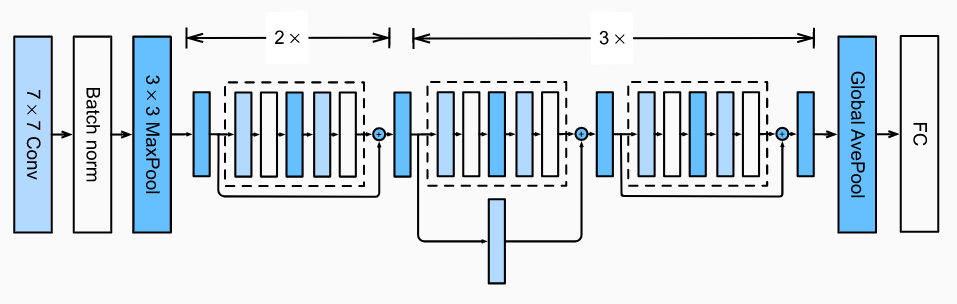


1. `i = Input(shape=IMAGE_SIZE + [3])` : Cela crée une couche d'entrée pour les images avec une taille spécifiée (`IMAGE_SIZE`) et 3 canaux de couleur (RGB).

2. `x = ZeroPadding2D(padding=(3, 3))(i)` : Cela ajoute des zéros autour des images pour une meilleure manipulation des bords.

3. `x = Conv2D(64, (7, 7), strides=(2, 2), padding='valid', kernel_initializer='he_normal')(x)` : Cela applique une couche de convolution avec **64** filtres, une taille de noyau de **7x7**, des décalages de **2x2** et une initialisation des poids selon la méthode "he_normal".

4. `x = BatchNormalization()(x)` : Cela applique une normalisation par lots pour normaliser les activations de la couche précédente.

5. `x = Activation('relu')(x)` : Cela applique une fonction d'activation **ReLU** pour introduire de la non-linéarité.

6. `x = ZeroPadding2D(padding=(1, 1))(x)` : Cela ajoute à nouveau des zéros autour des images.

7. `x = MaxPooling2D((3, 3), strides=(2, 2))(x)` : Cela applique une opération de max pooling avec une taille de fenêtre de 3x3 et des décalages de **2x2** pour réduire la taille spatiale des données.

Ensuite, le code fait appel à des blocs de convolution et d'identité (`conv_block` et `identity_block`) pour construire l'architecture ResNet. Ces blocs sont utilisés pour augmenter la profondeur du réseau et introduire des skip connections pour aider à la propagation des gradients.

In [ ]:
i = Input(shape=IMAGE_SIZE + [3])
x = ZeroPadding2D(padding=(3, 3))(i)
x = Conv2D(64, (7, 7),
           strides=(2, 2),
           padding='valid',
           kernel_initializer='he_normal'
           )(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])

x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

**Créer la dernière partie du modèle :**

`x = Flatten()(x):` Cette ligne applique une opération de mise en forme (flattening) pour convertir la sortie du modèle précédent en un vecteur unidimensionnel. Cela est nécessaire pour connecter cette sortie à une couche dense.

`prediction = Dense(len(folders), activation='softmax')(x):` Cette ligne ajoute une couche dense avec une activation softmax en tant que couche de prédiction. La taille de la sortie de cette couche est définie par le nombre de classes. L'activation softmax est utilisée pour obtenir des probabilités pour chaque classe de sortie.

Enfin, le modèle est créé en spécifiant les entrées et les sorties. `inputs=i` correspond à la couche d'entrée qu'on a définie précédemment, et `outputs=prediction` correspond à la couche de prédiction créée. 

In [14]:
x = Flatten()(x)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=i, outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

<a id='6'></a>
<h1><font color='#4169E1'>Entrainement du modèle</font></h1>

- **Loss function** : on utilise la cross-entropy catégorique éparse. Cette fonction de perte est couramment utilisée pour les problèmes de classification avec plusieurs classes où les étiquettes sont des entiers plutôt que des représentations one-hot.
- **Optimizer** : Adam.

In [17]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

- On prépare les données pour l'entraînement et de la validation du modèle en utilisant les générateurs.

$\rightarrow$ Ces générateurs de données permettent d'appliquer des augmentations de données et des prétraitements aux images pendant l'entraînement et la validation du modèle. Cela aide à améliorer la généralisation du modèle et à réduire le surajustement (overfitting) aux données d'entraînement.

In [19]:
def preprocess_input(x):
  x /= 127.5
  x -= 1.
  return x

train_gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [20]:
test_gen = val_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, class_mode='sparse')
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 2487 images belonging to 4 classes.
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}


In [22]:
train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)
valid_generator = val_gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


**Entraînement du modèle :**

In [23]:
checkpoint_filepath = '/tmp/checkpoint'
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
  callbacks=[
    tf.keras.callbacks.EarlyStopping(
      monitor='loss', patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True),
  ]
)

Epoch 1/20
77/77 [==============================] - 190s 2s/step - loss: 6.7889 - accuracy: 0.2866 - val_loss: 2.5643 - val_accuracy: 0.2771
Epoch 2/20
77/77 [==============================] - 150s 2s/step - loss: 1.8160 - accuracy: 0.4833 - val_loss: 2.6690 - val_accuracy: 0.3594
Epoch 3/20
77/77 [==============================] - 146s 2s/step - loss: 1.2241 - accuracy: 0.6509 - val_loss: 2.4863 - val_accuracy: 0.3421
Epoch 4/20
77/77 [==============================] - 149s 2s/step - loss: 0.9904 - accuracy: 0.7448 - val_loss: 2.7180 - val_accuracy: 0.4630
Epoch 5/20
77/77 [==============================] - 145s 2s/step - loss: 0.5017 - accuracy: 0.8504 - val_loss: 1.8004 - val_accuracy: 0.6698
Epoch 6/20
77/77 [==============================] - 148s 2s/step - loss: 0.4477 - accuracy: 0.8695 - val_loss: 1.7091 - val_accuracy: 0.6813
Epoch 7/20
77/77 [==============================] - 145s 2s/step - loss: 0.4271 - accuracy: 0.8981 - val_loss: 2.0188 - val_accuracy: 0.6957
Epoch 8/20
77

<a id='7'></a>
<h1><font color='#4169E1'>Résultats</font></h1>

<h2><font color='#D23B68'>Évolution de l'exactitude (accuracy) d'entraînement et de validation au fil des époques</font></h2>

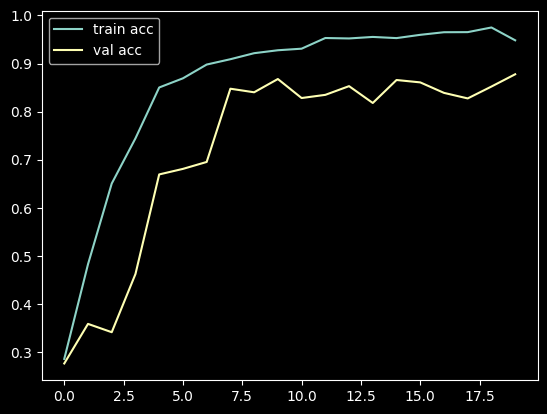

In [27]:
plt.plot(r['accuracy'], label='train acc')
plt.plot(r['val_accuracy'], label='val acc')
plt.legend()
plt.show()

<h2><font color='#D23B68'>Matrices de confusion</font></h2>

In [25]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in val_gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [28]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization

[[2354    2    5  136]

 [   2 2353  125    3]

 [   0   15 2460    3]

 [   8    0   43 2448]]


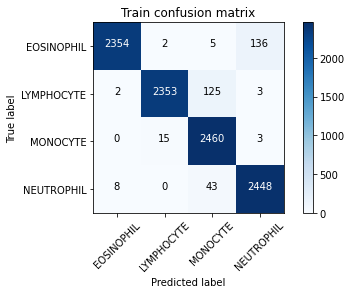

In [29]:
plot_confusion_matrix(cm, labels, title='Train confusion matrix')

Confusion matrix, without normalization

[[426   0   1 196]

 [  0 584  12  24]

 [ 37   5 568  10]

 [ 44   0  23 557]]


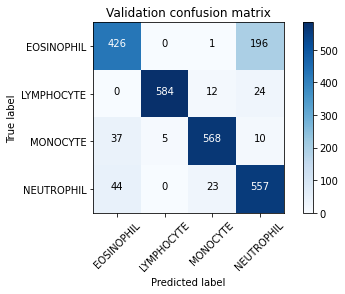

In [31]:
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

<a id='8'></a>
<h1><font color='#4169E1'>Quelques visualisations des représentations intermédiaires</font></h1>

<h2><font color='#D23B68'>Couches</font></h2>

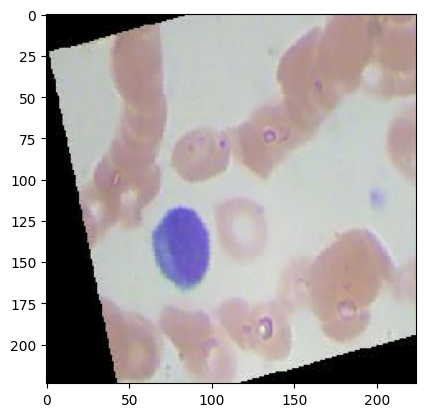

1/1 [==============================] - 0s 52ms/step
Couche 1: (1, 112, 112, 64)


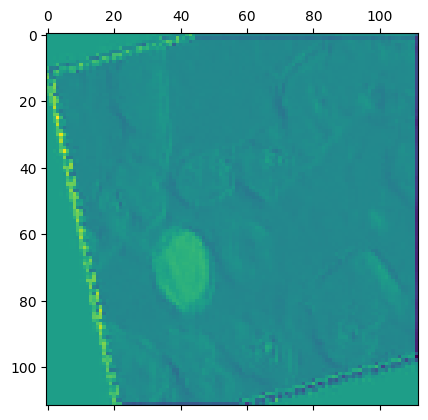

Couche 2: (1, 112, 112, 64)


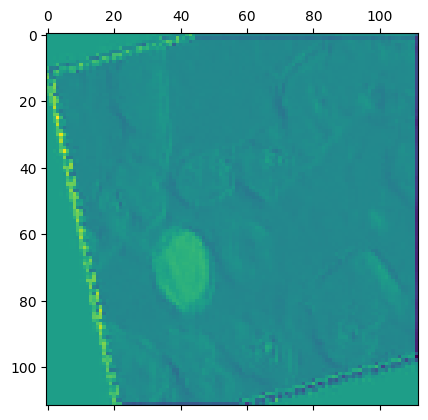

Couche 3: (1, 112, 112, 64)


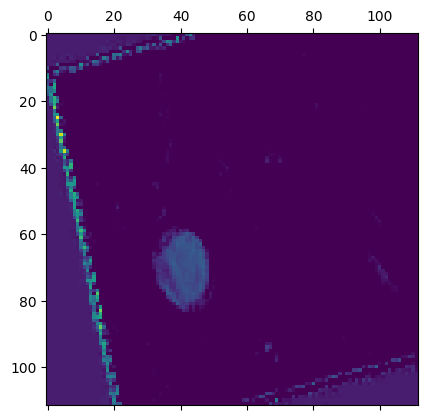

In [14]:
image_path = "./blood_cell_images/TEST/LYMPHOCYTE/_1_3972.jpeg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
array_img = tf.keras.preprocessing.image.img_to_array(img)
array_img = np.expand_dims(array_img, axis=0)
array_img /= 255.0

plt.imshow(array_img[0])
plt.show()

layer_names = ["conv2d", "batch_normalization", "activation"]
layer_outputs = []
for layer_name in layer_names:
    layer = model.get_layer(layer_name)
    layer_outputs.append(layer.output)

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(array_img)

for i, activation in enumerate(activations):
    print(f"Couche {i+1}: {activation.shape}")
    plt.matshow(activation[0, :, :, 0], cmap="viridis")
    plt.show()


<h2><font color='#D23B68'>Filtres</font></h2>

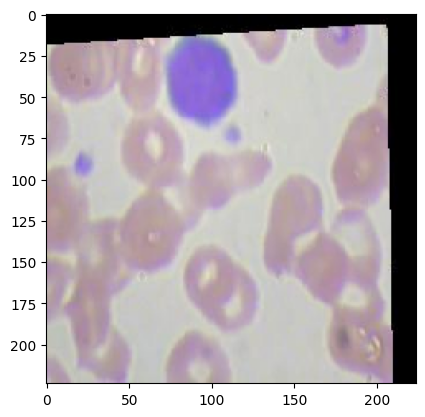

1/1 [==============================] - 0s 53ms/step


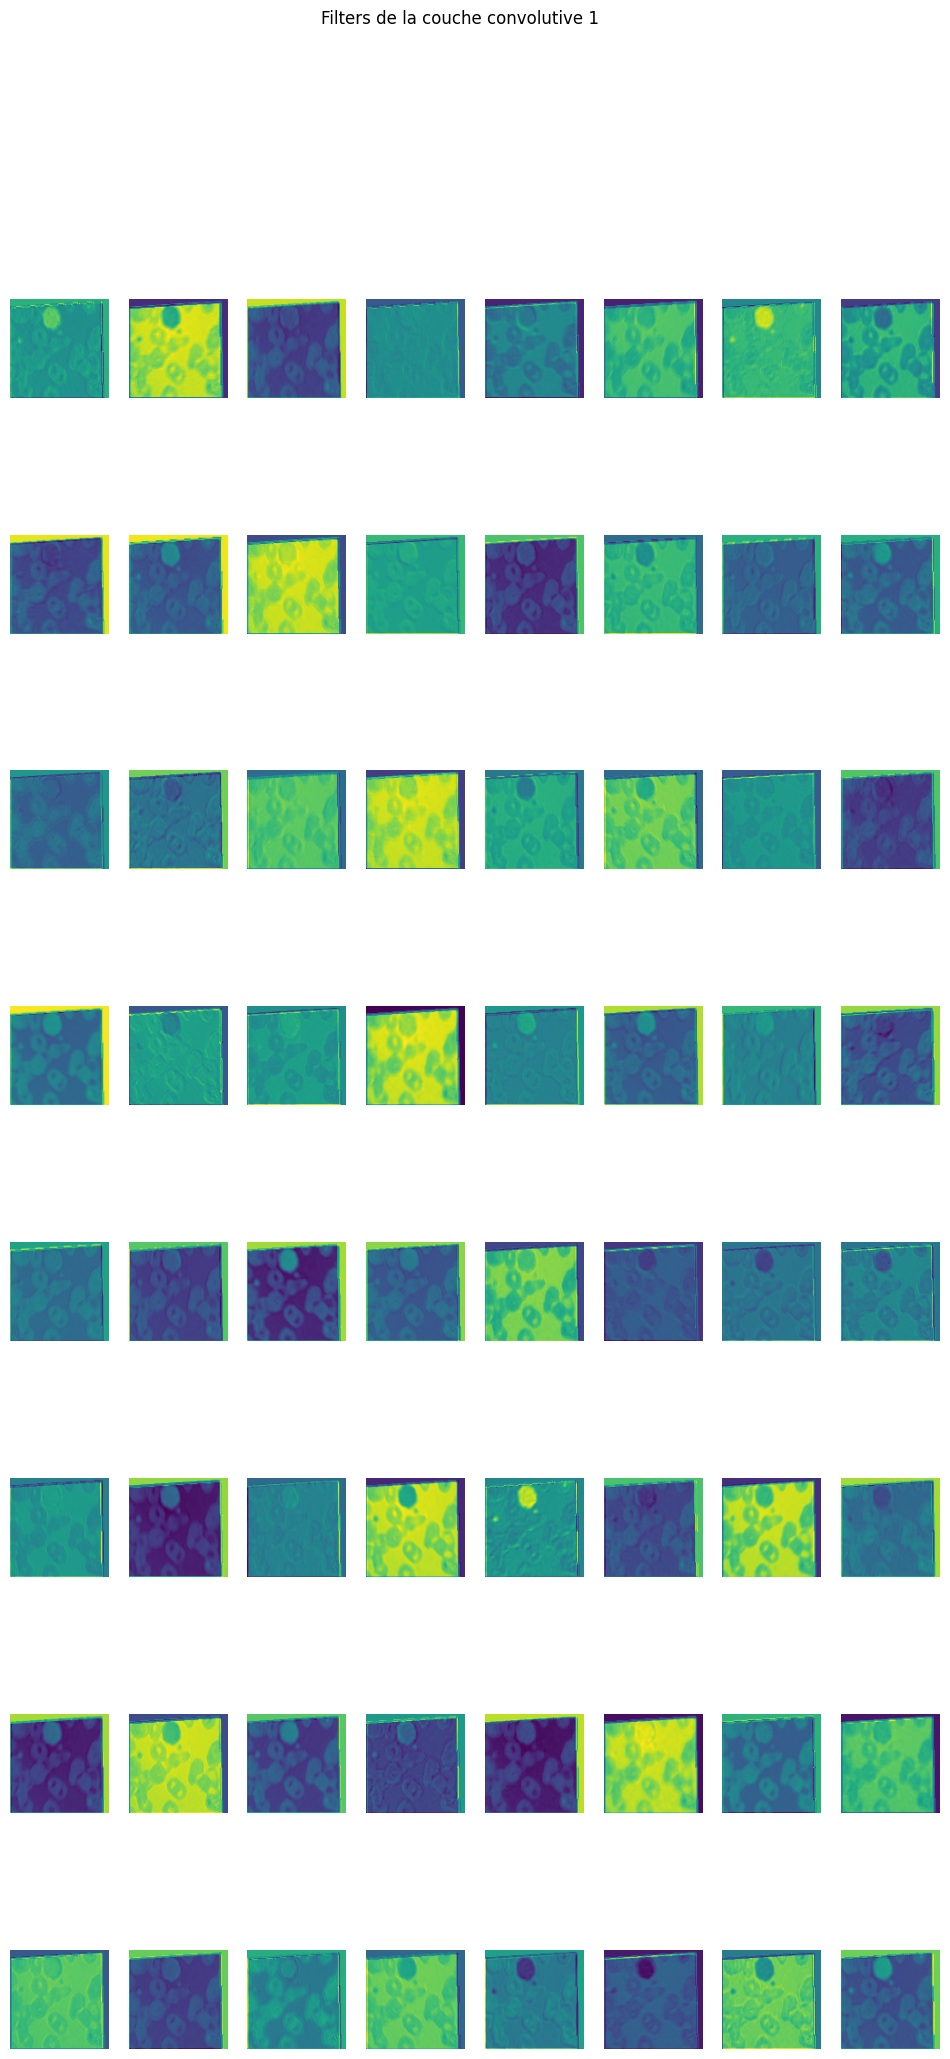

In [16]:
image_path = "./blood_cell_images/TEST/LYMPHOCYTE/_0_3962.jpeg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
array_img = tf.keras.preprocessing.image.img_to_array(img)
array_img = np.expand_dims(array_img, axis=0)
array_img /= 255.0

plt.imshow(array_img[0])
plt.show()

layer_names = ["conv2d", "batch_normalization", "activation"]
layer_outputs = []
for layer_name in layer_names:
    layer = model.get_layer(layer_name)
    layer_outputs.append(layer.output)

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(array_img)

conv1_activations = activations[0]
num_filters = conv1_activations.shape[-1]

num_rows = (num_filters - 1) // 8 + 1
num_cols = min(num_filters, 8)

plt.figure(figsize=(12, 3 * num_rows))
for i in range(num_filters):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(conv1_activations[0, :, :, i], cmap="viridis")
    plt.axis("off")
plt.suptitle("Filters de la couche convolutive 1")
plt.show()
